In [317]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [318]:
df = pd.read_csv('housing.csv')

In [319]:
df.shape

(545, 13)

In [320]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [321]:
df.drop(columns= ['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], inplace = True)

In [322]:
df.isnull().sum()

price    0
area     0
dtype: int64

In [323]:
df['price'].max()

13300000

In [324]:
df['area'].max()

16200

In [325]:
# df['price'] = df['price']/13300000
# df['area'] = df['area']/16200
df['price'] = df['price'].astype(float)
df['area'].astype(float)
df['price']

0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64

<Axes: xlabel='area', ylabel='price'>

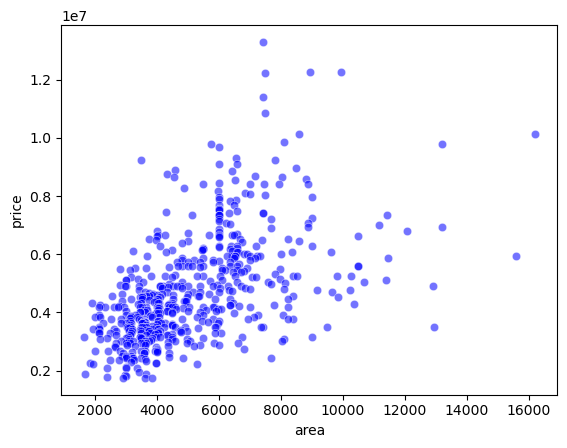

In [326]:
sns.scatterplot(data = df, x = 'area',y = 'price',c = 'b',alpha = 0.55)

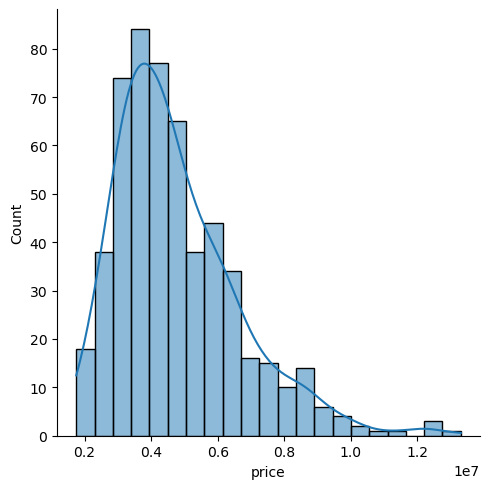

In [327]:
sns.displot(df['price'], kde = True)

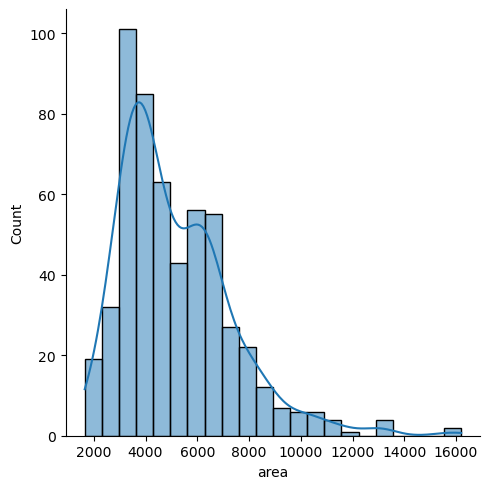

In [328]:
sns.displot(df['area'], kde = True)

<Axes: ylabel='price'>

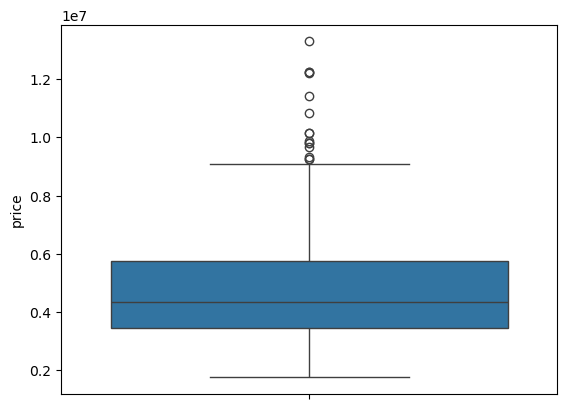

In [329]:
sns.boxplot(y='price', data=df)

<Axes: ylabel='area'>

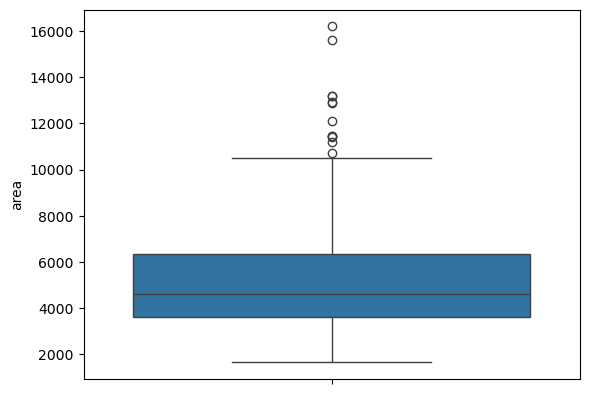

In [330]:
sns.boxplot(y='area', data=df)

In [331]:
df['price'].skew()

1.2122388370279802

In [332]:
df['area'].skew()

1.321188343153483

In [333]:
df.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [334]:
#Finding IQR
price25 = df['price'].quantile(0.25)
price75 = df['price'].quantile(0.75)
area25 = df['area'].quantile(0.25)
area75 = df['area'].quantile(0.75)

In [335]:
print(price25, price75, area25, area75)

3430000.0 5740000.0 3600.0 6360.0


In [336]:
iqrprice = price75 - price25

In [337]:
iqrarea = area75 - area25

In [338]:
priceupper = price75 + 1.5 * iqrprice
pricelower = price25 - 1.5 * iqrprice

In [339]:
areaupper = area75 + 1.5 * iqrarea
arealower = area25 - 1.5 * iqrarea

In [340]:

df['area'] = df['area'].apply(lambda x: min(max(x, arealower), areaupper))


df['price'] = df['price'].apply(lambda x: min(max(x, pricelower), priceupper))

print(df['price'].max(), df['area'].max())

9205000.0 10500.0


In [341]:
df['price'] = df['price']/9205000.0
df['area'] = df['area']/10500.0
x = np.array(df['area'])
y = np.array(df['price'])
m = len(x)
fx= np.zeros(m)
x = np.float64(x)
y = np.float64(y)

In [342]:
def compute_output(x,w,b):
    for i in range(m):
        fx[i] = w * x[i] + b
    return fx


In [343]:
df['price']

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
540    0.197719
541    0.191977
542    0.190114
543    0.190114
544    0.190114
Name: price, Length: 545, dtype: float64

Text(0, 0.5, 'Price')

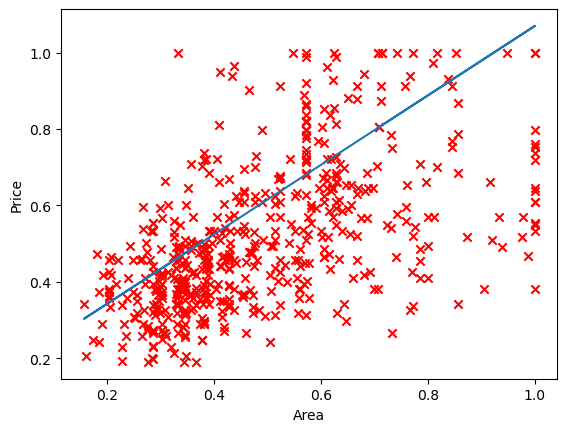

In [344]:
tmp_fx = compute_output(x, 0.91,0.16)
plt.plot(x, tmp_fx)
plt.scatter(x, y,marker='x', c='r',label='Actual Values')
plt.xlabel('Area')
plt.ylabel('Price')


In [345]:
def compute_cost(x,y,w,b):
    cost = 0
    for i in range(m):
        cost += (w * x[i] +b -y[i]) ** 2
    total_cost = cost / (2*m)
    return total_cost


In [346]:
cost = compute_cost(x,y,1,3)
cost

4.433594515238968

In [347]:
def compute_gradient(x,y,w,b):
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (w*x[i]+b-y[i])*x[i]
        dj_db += (w*x[i]+b-y[i])
    dj_dw /=m
    dj_db /=m
    return dj_dw, dj_db

In [348]:
def gradient_descent(x,y,w,b, alpha, iterations, gradient_function):  
    for i in range(iterations):
        
        dj_dw , dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    
    return w,b

In [349]:
w,b = gradient_descent(x,y,0,0,0.03,100000,compute_gradient)


In [350]:
w

0.5497203366505214

In [351]:
b

0.24644261117209543

Text(0, 0.5, 'Price')

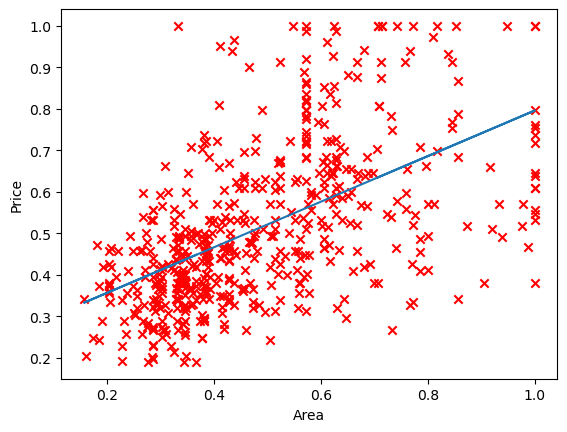

In [352]:
tmp_fx = compute_output(x, w,b)
plt.plot(x, tmp_fx)
plt.scatter(x, y,marker='x', c='r',label='Actual Values')
plt.xlabel('Area')
plt.ylabel('Price')